# 第11回演習「機械学習モデルの評価」その1


この演習では、分類問題に関する評価の方法を習得します。<br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
<hr />

## 1) データ全体を眺める

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True,precision=20) # 指数表記させない、小数点以下を20桁で

医療データ=load_breast_cancer() # サーキットラーンの、データセットの読み込み（アメリカで行われたがん検査の結果）
pd.set_option('display.max_columns', 40)
データフレーム = pd.DataFrame(医療データ.data, columns=医療データ.feature_names)
データフレーム # print関数を使わなくても画面表示できる

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 2) 2つだけ説明変数を取り出して散布図を描く

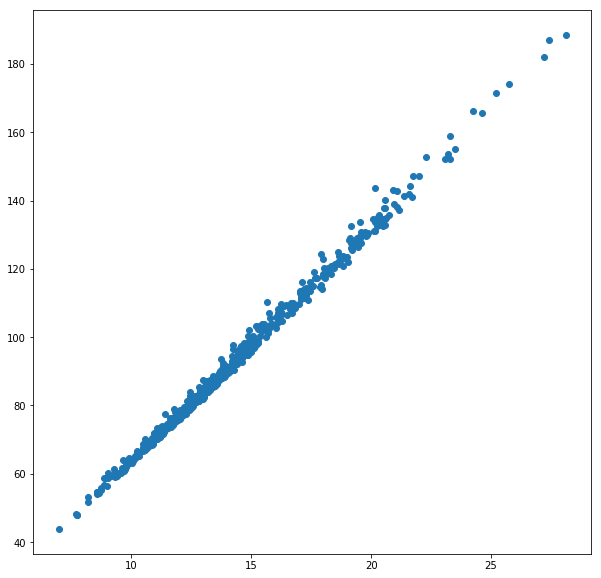

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
説明変数X=医療データ.data
目的変数y=1-医療データ.target # 引き算で陽性(0)と陰性(1)を入れ替える

# 2つだけ適当に説明変数を取り出して散布図を描く
plt.figure(figsize = (10, 10)) # 図示の準備
plt.scatter(説明変数X[:,0],説明変数X[:,2]) # 平均半径と、平均外周
plt.show()
print(医療データ.target)

## 3) ロジスティック回帰

In [8]:
説明変数X=説明変数X[:,:13] # mean radius(半径の平均) から perimeter error(周囲の誤差) までを取り出す

ロジスティック回帰=LogisticRegression()
ロジスティック回帰.fit(説明変数X,目的変数y) # 学習
予測されたy=ロジスティック回帰.predict(説明変数X)
print(予測されたy) # 推定されたy
print(目的変数y) # 用意されていたy

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 

## 4) 正解率

$$ \frac{TP+TN}{TP+TN+FP+FN} $$

In [16]:
# from sklearn.metrics import accuracy_score の機能
'''全ての確率が分母に。正解した確率のみが分子にくる。'''
print(accuracy_score(目的変数y,予測されたy))
正解率=(cm[1][1]+cm[0][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print(正解率)

0.9226713532513181
0.9226713532513181


## 5) 適合率(precision)

$$ \frac{TP}{TP+FP} $$

In [17]:
# from sklearn.metrics import precision_score の機能
'''（ポジティブと予測された中で、どれだけが本当にポジティブであったか。）
陽性反応的中度
これが低いと、陰性なのに不安にさせる人を増やすことになる。'''
print(precision_score(目的変数y,予測されたy))
適合率=cm[1][1]/(cm[1][1]+cm[0][1])
print(適合率)

0.9285714285714286
0.9285714285714286


## 6) 再現率(recall)

$$ \frac{TP}{TP+FN} $$

In [18]:
# from sklearn.metrics import recall_score の機能
'''実際にポジティブであった中で、どれだけをポジティブと予想できたか
真陽性率
これが低いと、病気の見落としにつながる。'''
print(recall_score(目的変数y,予測されたy))
再現率=cm[1][1]/(cm[1][1]+cm[1][0])
print(再現率)

0.8584905660377359
0.8584905660377359


## 7) 混同行列

In [15]:
cm=confusion_matrix(目的変数y,予測されたy)
軸=[["TN","FP"],["FN","TP"]]
print(軸)
print(cm)

print(cm[0][0])
print(cm[0][1])
print(cm[1][0])
print(cm[1][1])

[['TN', 'FP'], ['FN', 'TP']]
[[343  14]
 [ 30 182]]
343
14
30
182


## 小出しの任意課題(その1)
<span style="background-color:#FFFF99">accuracy_scoreを使わずに正解率を表示させてください。<br />
confusion_matrixは用いても構いません。<br />同様に「precision_scoreを使わずに適合率」「recall_scoreを使わずに再現率」<br />を表示させてください。</span><hr />

## 8) F値(適合率と再現率の両方を考慮した値)

\begin{align} \frac{2\times適合率\times再現率}{適合率+再現率}  \end{align}

In [19]:
# from sklearn.metrics import f1_score の機能
print(f1_score(目的変数y,予測されたy))

0.8921568627450982


## 9) 予測確率(0に予測される確率、1に予測される確率) 

In [22]:
np.set_printoptions(threshold=3000) # 行を端折らせない設定
'''説明変数Xの各データが、0に予測されるか1に予測されるかの確率を全て出す
predict_probaの機能'''
print(ロジスティック回帰.predict_proba(説明変数X))
# これだと閾値0.5

[[0.0003453605740326715  0.9996546394259673    ]
 [0.00043964278498398457 0.999560357215016     ]
 [0.00012857486968020915 0.9998714251303198    ]
 [0.47799888122313816    0.5220011187768618    ]
 [0.00006133643563988045 0.9999386635643601    ]
 [0.8499537785230732     0.15004622147692678   ]
 [0.0060108988972708     0.9939891011027292    ]
 [0.42614294687000975    0.5738570531299902    ]
 [0.35458769237952803    0.645412307620472     ]
 [0.4920749553599787     0.5079250446400213    ]
 [0.26708267974028865    0.7329173202597113    ]
 [0.14290044611457398    0.857099553885426     ]
 [0.00000869789226853879 0.9999913021077315    ]
 [0.07839416080987871    0.9216058391901213    ]
 [0.2046239817697466     0.7953760182302534    ]
 [0.04656244663848563    0.9534375533615144    ]
 [0.44981705700843333    0.5501829429915667    ]
 [0.02560062370364924    0.9743993762963508    ]
 [0.00003126770755357278 0.9999687322924464    ]
 [0.9323178476449099     0.06768215235509009   ]
 [0.9347704874936358

## 10) 陽性(悪性)の見逃しを減らすため、閾値を30%に変える

In [29]:
予測し直したy=(ロジスティック回帰.predict_proba(説明変数X)[:,1]>0.3) # 閾値 0.3

print(confusion_matrix(目的変数y,予測し直したy)) # 混合行列
print(accuracy_score(目的変数y,予測し直したy))  # 正解率
print(recall_score(目的変数y,予測し直したy)) # 再現率

[[324  33]
 [ 15 197]]
0.9156414762741653
0.9292452830188679


### 小出しの任意課題(その2) 
<span style="background-color:#FFFF99">0.3以外の閾値も試し、混同行列、正解率などを表示させてください。</span><hr />

## 11) ROC曲線

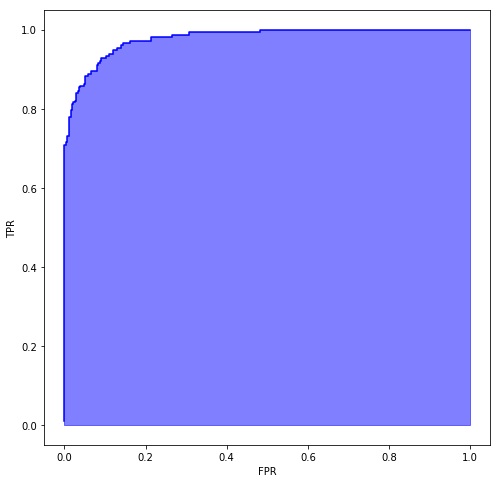

In [30]:
予測確率=ロジスティック回帰.predict_proba(説明変数X) # 予測確率
偽陽性率FPR,真陽性率TPR,閾値=roc_curve(目的変数y,予測確率[:,1]) # 正解ラベルと予測確率が引数
plt.figure(figsize = (8, 8))
plt.step(偽陽性率FPR,真陽性率TPR,color='b')
plt.fill_between(偽陽性率FPR,真陽性率TPR,0,color='b',alpha=0.5)
plt.xlabel('FPR') # 偽陽性率 FP/(TN+FP) 
plt.ylabel('TPR') # 真陽性率 TP/(TP+FN) 
plt.show()

## 12) ROC曲線の中身を数値として表示

In [17]:
ROC表示用データフレーム=pd.DataFrame({'閾値':閾値,'偽陽性率FPR': 偽陽性率FPR, 
                            '真陽性率TPR': 真陽性率TPR})
display(ROC表示用データフレーム.iloc[:,[2,0,1]]) # 表示順を入れ替える

,閾値,偽陽性率FPR,真陽性率TPR
0,1.000000,0.000000,0.009434
1,0.891134,0.000000,0.707547
2,0.884727,0.002801,0.707547
3,0.874840,0.002801,0.716981
4,0.859633,0.005602,0.716981
...,...,...,...
58,0.079711,0.308123,0.985849
59,0.079428,0.308123,0.995283
60,0.044473,0.481793,0.995283
61,0.044253,0.481793,1.000000


## 13) AUCの値

In [18]:
# from sklearn.metrics import roc_auc_score の機能
print(roc_auc_score(目的変数y,予測確率[:,1]))

0.9785027218434543


第11回第2章の演習はここまでです。引き続き、第3章の講義を見ましょう。